In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 2559.5, 2047.5, -0.5)

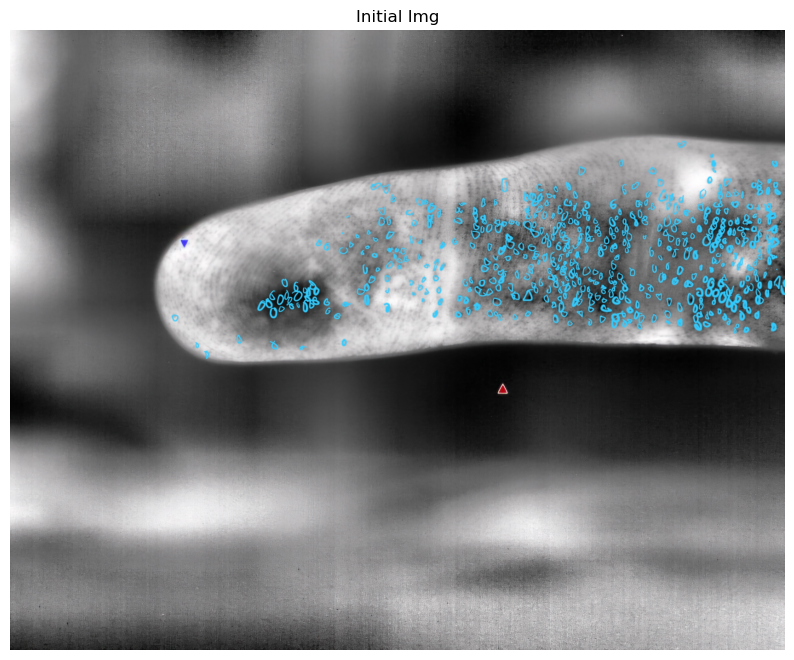

In [50]:
# Import data 
image_path = '/Users/rickysu/Projects/sweatPoresActivation/images/FingerStraightAnnotated.bmp'
img = cv2.imread(image_path)

# show the image 
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = 'gray')
plt.title("Initial Img")
plt.axis("off")

(-0.5, 2559.5, 2047.5, -0.5)

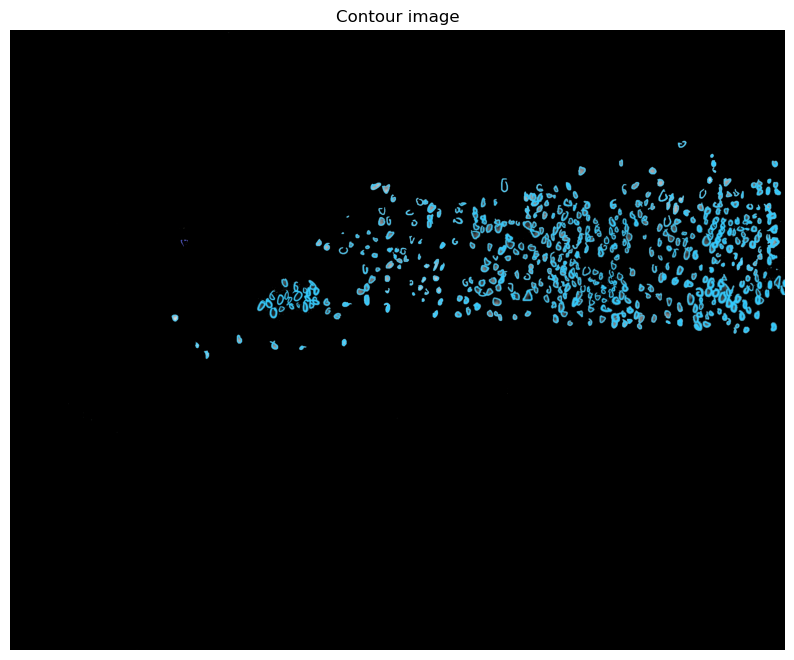

In [55]:
# Use the cvtColor() function to HSV(Hue, Saturation, Value) the image 
# Better for color-based segmentation Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for green, yellow, and red color in HSV (Adjust these values as needed)
# Green circles
lower_green = np.array([30, 30, 30])
upper_green = np.array([90, 245, 245]) 
# Red circles
lower_red = np.array([0, 100, 100])  
upper_red = np.array([20, 255, 255]) 
# Yellow circles
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255]) 

# Threshold the HSV image to isolate green, red, and yellow regions
green_mask = cv2.inRange(hsv, lower_green, upper_green)
red_mask = cv2.inRange(hsv, lower_red, upper_red)
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Combine the red green, and yellow mask into just one mask
combined_mask = cv2.bitwise_or(cv2.bitwise_or(green_mask, red_mask), yellow_mask)

# Find contours of the green, red, and yellow regions
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

# Create a blank mask for background
blank_mask = np.zeros_like(img[:, :, 0]) # Black mask

# Draw contours on the blank mask
cv2.drawContours(blank_mask, contours, -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
contour_image = cv2.bitwise_and(img, img, mask=blank_mask)


plt.figure(figsize = (10, 10))
plt.imshow(contour_image); plt.title("Contour image"); plt.axis("off")

# Morphological operation 

(-0.5, 2559.5, 2047.5, -0.5)

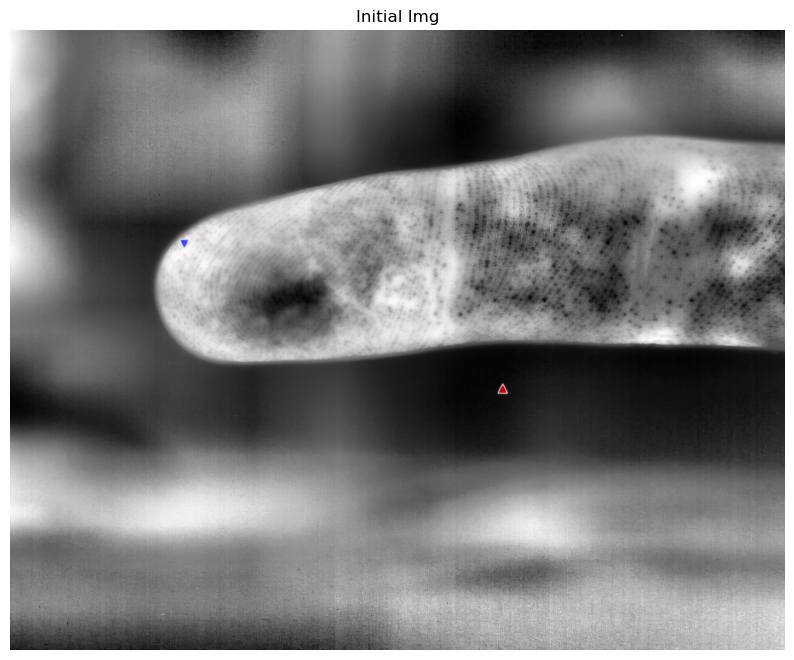

In [35]:
image_path = '/Users/rickysu/Projects/sweatPoresActivation/images/1.bmp'
img = cv2.imread(image_path)

# show the image 
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = 'gray')
plt.title("Initial Img")
plt.axis("off")

In [45]:
def top_hat_transform(image, kernel_size=(5,5)):
    # Ensure image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure image is 8-bit
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)
    
    # Create a structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    
    # Perform Top Hat operation
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    
    return top_hat

In [46]:
def enhanced_top_hat(image, kernel_size=(5,5), clip_limit=2.0, tile_grid_size=(8,8)):
    # Perform Top Hat
    top_hat = top_hat_transform(img, kernel_size)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced = clahe.apply(top_hat)
    
    return enhanced

Text(0.5, 1.0, 'Top Hat Operation')

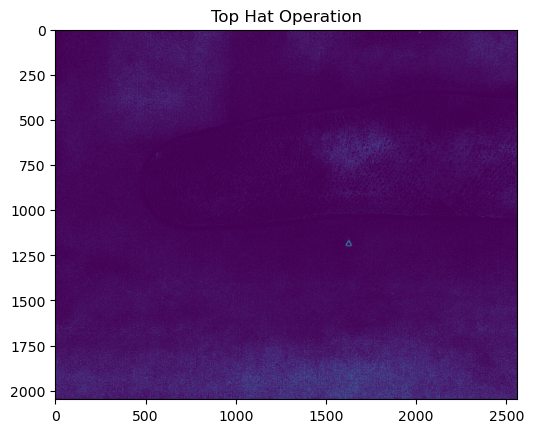

In [47]:
top_hat_img = enhanced_top_hat(img)

plt.imshow(top_hat_img);plt.title("Top Hat Operation")